#Глава 2

##Задание 2.2.

Написать класс, называемый SawtoothSignal, расширяющий сигнал signal и предоствляющий evaluate для оценки пилообразного сигнала.

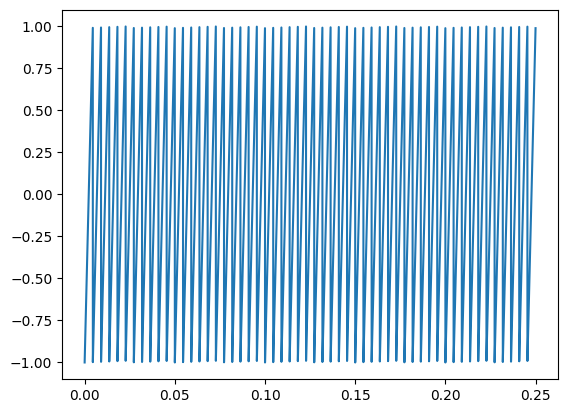

In [1]:
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias
import numpy as np
class SawtoothSignal(Sinusoid):
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / (2 * np.pi)
        remainder, frac = np.modf(cycles)
        return normalize(unbias(remainder), self.amp)

sawtooth = SawtoothSignal(freq = 220, amp = 1).make_wave(duration=0.25, framerate=40000)
sawtooth.plot()

Спектр пилообразного сигнала:

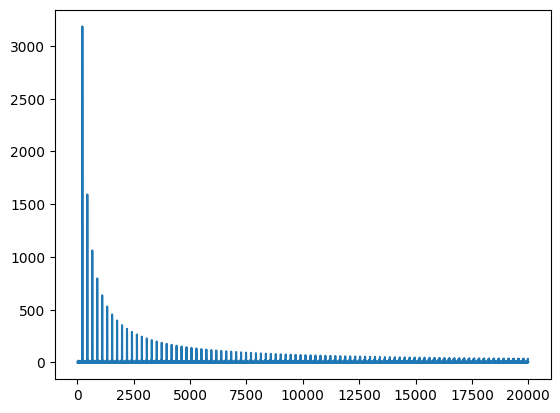

In [2]:
spectr = sawtooth.make_spectrum()
spectr.plot()

Определение соотношений гармонической структуры пилообразного сигнала с треугольным и прямоугольным сигналами:

In [6]:
from thinkdsp import SquareSignal, TriangleSignal
square_spectr = SquareSignal(freq = 220, amp = 0.5).make_wave(duration=0.25, framerate=40000).make_spectrum()
triangle_spectr = TriangleSignal(freq = 220, amp = 0.5).make_wave(duration=0.25, framerate=40000).make_spectrum()

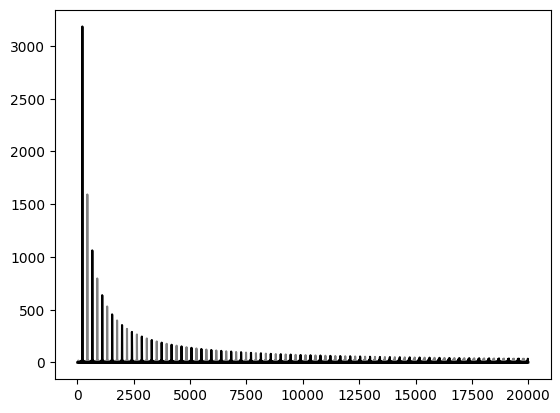

In [7]:
spectr.plot(color='gray')
square_spectr.plot(color='black')

Из графика видно, что у пилообразного сигнала амплитуды гармоник уменьшаются так же, как у прямоугольного сигнала, но самих гармоник в два раза больше (есть и чётные, и нечётные).

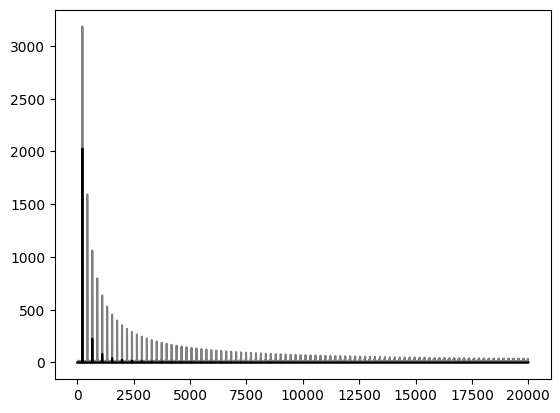

In [8]:
spectr.plot(color='gray')
triangle_spectr.plot(color='black')

Из графика выше видно, что в отличие от треугольного сигнала, у пилообразного гармоники затухают гораздо медленнее.

## Задание 2.3.

Создать прямоугольный сигнал 1100Гц и вычислить wave с выборками 10000 кадров в секунду.

Writing square.wav


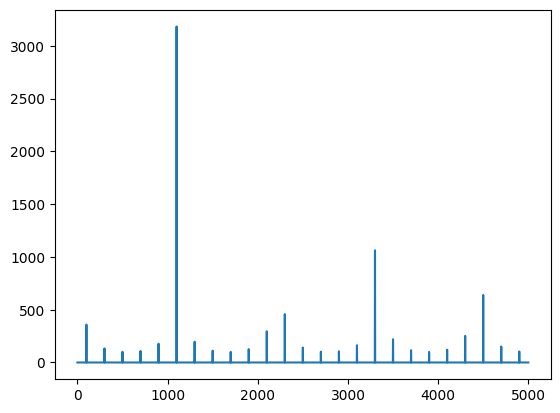

In [9]:
square_wave = SquareSignal(freq = 1100, amp = 1).make_wave(duration = 0.5, framerate=10000)
square_wave.write("square.wav")
square_wave.make_spectrum().plot()

При частоте дискретизации 10 000 Гц прямоугольный сигнал 1100 Гц порождает алиасинг гармоник выше 5000 Гц. На спектре видна основная частота (1100 Гц) и третья гармоника (3300 Гц), но более высокие гармоники отражаются ("заворачиваются") в слышимый диапазон: 5500 Гц становится 4500 Гц, 7700 Гц — 2300 Гц, 9900 Гц — 100 Гц. При прослушивании вместо чистого сигнала 1100 Гц слышится грубый низкочастотный гул около 100 Гц с фоновыми высокочастотными призвуками. В результате частотных искажений исходный тембр полностью теряется, заменяясь неестественным дребезжащим звуком с преобладанием низких частот.

## Задание 2.4.

Взять объект Spectrum и распечатать несколько первых значений spectrum.fs. Убедиться, что они начинаются с нуля.

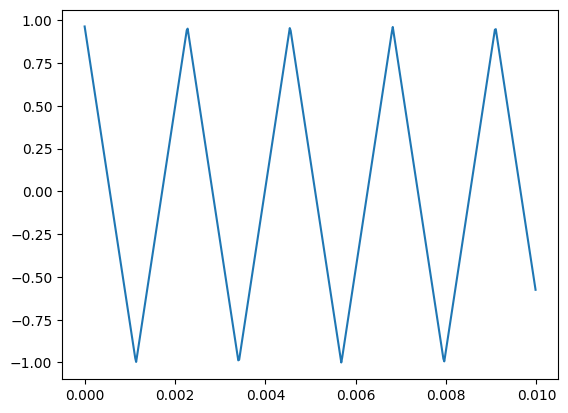

In [10]:
experiment_signal = TriangleSignal(freq = 440, amp = 1).make_wave(duration = 0.01, framerate = 50000)
experiment_signal.plot()

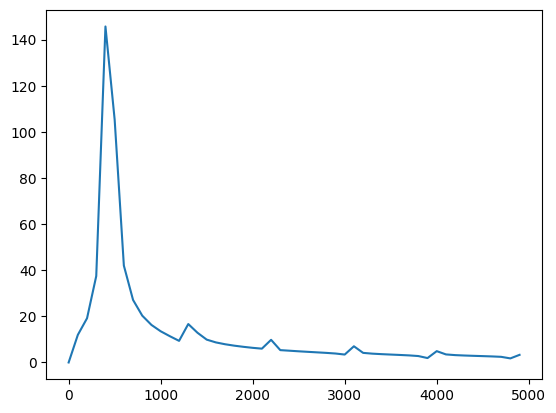

In [11]:
experiment_signal.make_spectrum().plot(high=5000)

Определение амплитуды и фазы:

In [12]:
hs0 = experiment_signal.make_spectrum().hs[0]
print(f"Амплитуда: {abs(hs0):.2e}, Фаза: {np.angle(hs0):.2f} радиан")

Амплитуда: 1.32e-14, Фаза: 3.14 радиан


Теоретически для идеального треугольного сигнала без смещения амплитуда hs[0] должна быть точно нулевой, так как интеграл симметричного сигнала за период равен нулю, но практически наблюдается крайне малое значение (~10⁻¹⁴), которое возникает из-за численных погрешностей при дискретизации и БПФ и ограниченной точности вычислений с плавающей запятой.



Фаза π радиан указывает на то, что мнимая часть hs[0] близка к нулю, а действительная часть отрицательна (но крайне мала по модулю).

Присвоение Spectrum.hs[0] = 100:

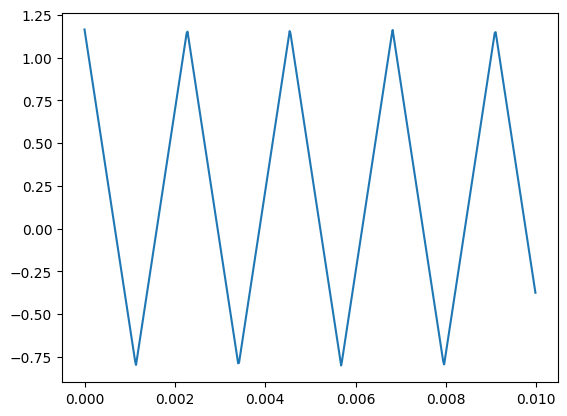

In [13]:
spec = experiment_signal.make_spectrum()
spec.hs[0] = 100
spec.make_wave().plot()

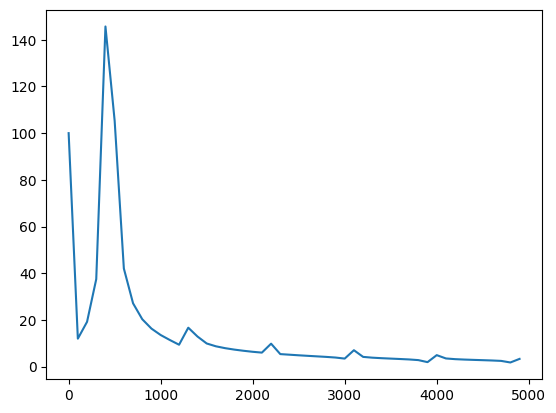

In [14]:
spec.plot(high=5000)

Изменение нулевой компоненты (spec.hs[0] = 100) приводит к cмещению сигнала по вертикали, cохранению исходной формы (частота, амплитуда колебаний, гармоники) и появлению в спектре доминирующей компоненты на 0 Гц.

## Задание 2.5.

Написать функцию, принимающую Spectrum как параметр и изменяющую его делением каждого элемента hs на соответствующую частоту из fs.
Проверить функцию используя прямоугольный, треугольный или пилообразный сигналы.

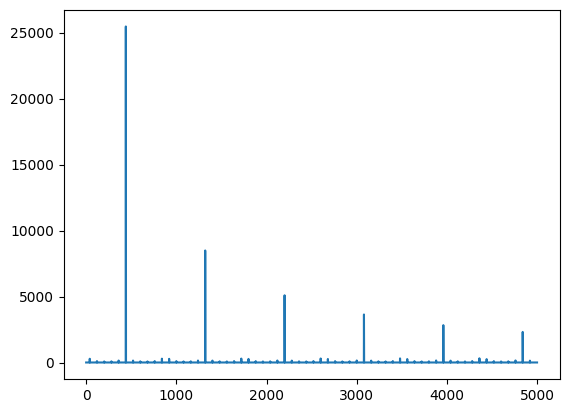

In [15]:
from thinkdsp import Spectrum
def filter_spectrum(spectrum):
    new_spectrum = Spectrum(np.copy(spectrum.hs), np.copy(spectrum.fs), spectrum.framerate)
    new_spectrum.hs[0] = 0
    new_spectrum.hs[1:] /= new_spectrum.fs[1:]
    return new_spectrum
square_spectr = SquareSignal(freq = 440, amp = 1).make_wave(duration=1, framerate=40000).make_spectrum()
square_spectr.plot(high = 5000)

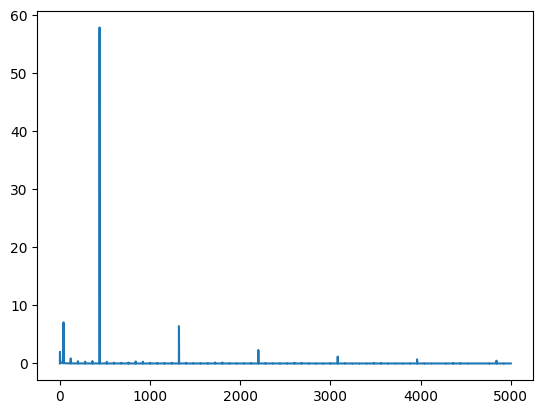

In [16]:
filter_square = filter_spectrum(square_spectr)
filter_square.plot(high = 5000)

In [17]:
filter_square.make_wave().write("filter_square.wav")

Writing filter_square.wav


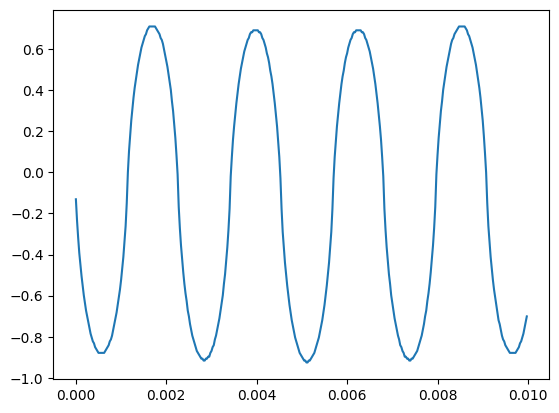

In [18]:
from thinkdsp import read_wave
filename = "filter_square.wav"
wave = read_wave(filename)
start = 0.0
length = 0.01
segment = wave.segment(start, length)
segment.plot()

Полученная функция по работе близка к ФНЧ, но с математически точным преобразованием спектра, поскольку практически полностью отфильтровывает высокие гармоники и усиливает низкие частоты сигнала.
Т.к высокие частоты ослаблены, то звук становится глуше, мягче, менее резким.


Из графика выше видно, что острые "ступеньки" прямоугольного сигнала сглаживаются и форма становится более плавной.

## Задание 2.6.

Найти сигнала состоящего из четных и нечетных гармоник, совпадающих пропорционально 1/f^2.

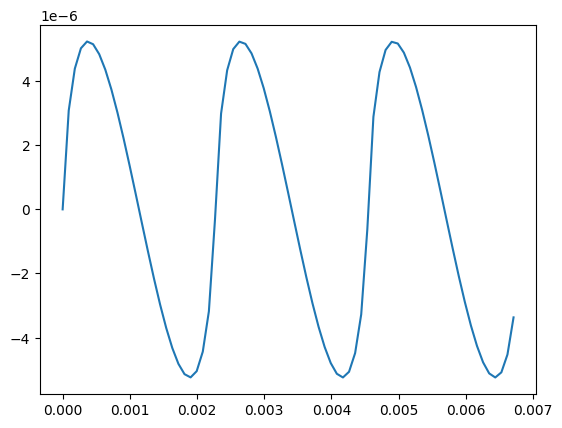

In [19]:
from thinkdsp import SinSignal
freq = 440
freqs = np.arange(freq, 20000, freq)
amps = 1 / freqs ** 2
signal = sum([SinSignal(freq = fr, amp = a) for fr, a in zip(freqs, amps)])
signal.plot()

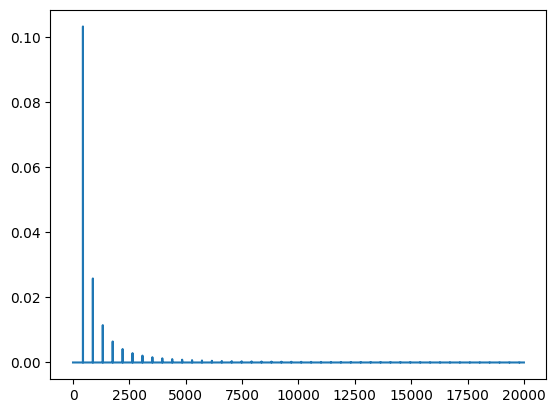

In [20]:
signal.make_wave(framerate=40000).make_spectrum().plot()